In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import sys
import tensorflow as tf



In [2]:
# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST 불러오기
(X_train,Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print('학습셋 이미지 수 : %d 개' % (X_train.shape[0]))
print('테스트셋 이미지 수 : %d 개' % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


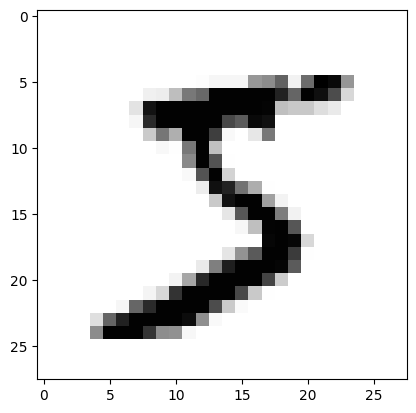

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [4]:
# 픽셀로 확인 
for x in X_train[0] : 
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [6]:
# 28 * 28 2차원 데이터를 784개의 1차원 데이터로 바꿔주면 784개의 속성으로 이용가능하다
# 차원 변환 과정 (2차원 -> 1차원)
X_train = X_train.reshape(X_train.shape[0], 784)

# keras는 데이터가 0~1 사이 값일 때 최적의 성능으로 예측함
# 데이터 정규화(normalization) : 255로 나눠준다
X_train = X_train.astype('float64') # 현재 정수형이므로 실수형으로 바꾼 후 정규화 실행
X_train = X_train / 255

# 테스트 셋에도 정규화 작업
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') /255

# 클래스 값 확인
print('class : %d' % (Y_class_train[0]))

# 현재 클래스를 0~9 정수값에서 0 or 1인 벡터로 수정해야 함
# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])

class : 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os 

# seed
seed =0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 차원 축소, 정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],784).astype('float32')/255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [9]:
# 모델 프레임 설정 
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 저장, 모델 최적화 단계에서 학습 자동 중단 설정 
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [10]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.14688, saving model to ./model\01-0.1469.hdf5

Epoch 2: val_loss improved from 0.14688 to 0.10277, saving model to ./model\02-0.1028.hdf5

Epoch 3: val_loss improved from 0.10277 to 0.08757, saving model to ./model\03-0.0876.hdf5

Epoch 4: val_loss improved from 0.08757 to 0.07588, saving model to ./model\04-0.0759.hdf5

Epoch 5: val_loss improved from 0.07588 to 0.07340, saving model to ./model\05-0.0734.hdf5

Epoch 6: val_loss improved from 0.07340 to 0.06653, saving model to ./model\06-0.0665.hdf5

Epoch 7: val_loss did not improve from 0.06653

Epoch 8: val_loss improved from 0.06653 to 0.06214, saving model to ./model\08-0.0621.hdf5

Epoch 9: val_loss did not improve from 0.06214

Epoch 10: val_loss improved from 0.06214 to 0.05922, saving model to ./model\10-0.0592.hdf5

Epoch 11: val_loss did not improve from 0.05922

Epoch 12: val_loss did not improve from 0.05922

Epoch 13: val_loss did not improve from 0.05922

Epoch 14: val_loss did 

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

313/313 [==============================] - 1s 4ms/step - loss: 0.0652 - accuracy: 0.9843

 Test Accuracy: 0.9843


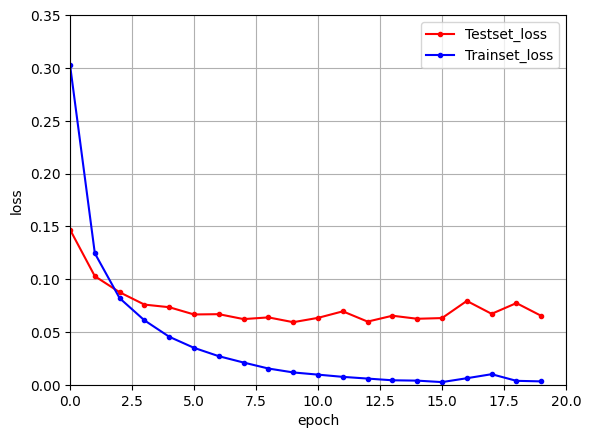

In [13]:
# 정확도
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

# test - 오차 
y_vloss = history.history['val_loss']

# train - 오차
y_loss = history.history['loss']

# 그래프
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시 
plt.legend(loc='upper right')
plt.axis([0,20,0,0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# seed
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기 
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Epoch 1: val_loss improved from inf to 0.05194, saving model to ./model\01-0.0519.hdf5

Epoch 2: val_loss improved from 0.05194 to 0.04193, saving model to ./model\02-0.0419.hdf5

Epoch 3: val_loss improved from 0.04193 to 0.03495, saving model to ./model\03-0.0350.hdf5

Epoch 4: val_loss improved from 0.03495 to 0.03401, saving model to ./model\04-0.0340.hdf5

Epoch 5: val_loss improved from 0.03401 to 0.03313, saving model to ./model\05-0.0331.hdf5

Epoch 6: val_loss improved from 0.03313 to 0.02902, saving model to ./model\06-0.0290.hdf5

Epoch 7: val_loss improved from 0.02902 to 0.02685, saving model to ./model\07-0.0268.hdf5

Epoch 8: val_loss did not improve from 0.02685

Epoch 9: val_loss did not improve from 0.02685

Epoch 10: val_loss did not improve from 0.02685

Epoch 11: val_loss improved from 0.02685 to 0.02582, saving model to ./model\11-0.0258.hdf5

Epoch 12: val_loss did not improve from 0.02582

Epoch 13: val_loss improved from 0.02582 to 0.02536, saving model to ./m

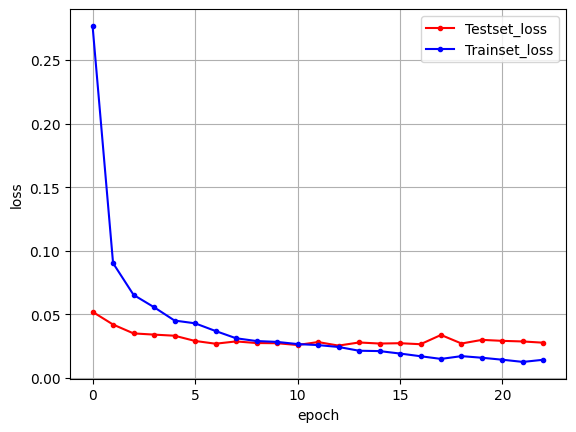

In [15]:
# 모델 최적화 설정 
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor= 'val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행 
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

# 테스트셋 오차
y_vloss = history.history['val_loss']

# 학습셋 오차
y_loss = history.history['loss']

# 시각화
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그리드 & 레이블
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4960 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3776 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3379 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3155 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2973 - accuracy: 0.8889
